In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df_0 = pd.read_csv('bengaluru_house_prices.csv')

In [5]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df_0

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
cols_to_use = ['location', 'size', 'total_sqft', 'bath', 'price']
df_1 = df_0[cols_to_use]

In [8]:
df_1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
df_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df_2  = df_1.dropna()

In [11]:
df_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df_3 = df_2.copy()

In [13]:
df_3['bedroom'] = df_3['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df_3

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df_3[~(df_3['total_sqft'].apply(is_float))]

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
def range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0].strip()) + float(tokens[1].strip()))/2
    try:
        return float(x)
    except:
        return None


In [20]:
df_4 = df_3.copy()

In [21]:
df_4['total_sqft'] = df_4['total_sqft'].apply(range_to_num)

In [22]:
df_4.loc[[30, 122, 137], :]

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4
122,Hebbal,4 BHK,5611.5,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2


In [23]:
df_4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bedroom        0
dtype: int64

In [24]:
df_5 = df_4.dropna()
df_5.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

### Feature Engineering

In [25]:
df_6 = df_5.copy()
df_6['price_per_sqft'] = ((df_5['price'] * 1000000) / df_5['total_sqft'])

In [26]:
df_6

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66898.349262
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104073.363190


In [27]:
df_6['location'].value_counts()

location
Whitefield                         532
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     264
Thanisandra                        232
                                  ... 
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Electronic City Phase 1,             1
Chuchangatta Colony                  1
Name: count, Length: 1298, dtype: int64

In [28]:
location_counts = df_6['location'].value_counts()

In [29]:
len(location_counts[location_counts <= 10])

1058

In [30]:
len(location_counts[location_counts > 10])

240

In [31]:
location_counts_less_than_10 = location_counts[location_counts <= 10]

In [32]:
df_7 = df_6.copy()

In [33]:
df_7['location'] = df_7['location'].apply(lambda x: 'Other' if x in location_counts_less_than_10 else x)

In [34]:

df_7.head(12)

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
9,Other,6 Bedroom,1020.0,6.0,370.00,6,362745.098039


In [35]:
df_7[df_7['location'] == 'Other']

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.00,6,362745.098039
18,Other,3 BHK,2770.0,4.0,290.00,3,104693.140794
19,Other,2 BHK,1100.0,2.0,48.00,2,43636.363636
24,Other,1 RK,510.0,1.0,25.25,1,49509.803922
25,Other,3 BHK,1250.0,3.0,56.00,3,44800.000000
...,...,...,...,...,...,...,...
13291,Other,1 Bedroom,812.0,1.0,26.00,1,32019.704433
13292,Other,3 BHK,1440.0,2.0,63.93,3,44395.833333
13302,Other,2 BHK,1075.0,2.0,48.00,2,44651.162791
13306,Other,4 Bedroom,1200.0,5.0,325.00,4,270833.333333


### Removing Outliers

- Assuming that I have consulted with a my manager about the threshold of a bedroom in relation to the total area per sqft and they said it should be 300 or less, then 2 bedrooms should be 600 at minimum

In [36]:
df_7[(df_7['total_sqft']/df_7['bedroom']) < 300]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Other,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,Other,3 Bedroom,500.0,3.0,100.0,3,200000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,155714.285714
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,108333.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,90909.090909
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,90439.276486


In [37]:
df_8 = df_7[~((df_7['total_sqft']/df_7['bedroom']) < 300)]

In [38]:
df_8

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66898.349262
13316,Other,4 BHK,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104073.363190


### Removing Outliers

In [39]:
round(df_8['price_per_sqft'].describe(), 2)

count      12456.00
mean       63085.03
std        41681.27
min         2678.30
25%        42105.26
50%        52941.18
75%        69166.67
max      1764705.88
Name: price_per_sqft, dtype: float64

- The minimum and the maximum shows a wide `variation` in property prices, so I will be removing the determining and removing `outliers` using the `mean` and `standard deviation`

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [41]:
df_9 = remove_pps_outliers(df_8)

In [42]:
df_9

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,35200.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,32000.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,69166.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,34188.034188
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,45614.035088
...,...,...,...,...,...,...,...
10240,Yeshwanthpur,3 BHK,1676.0,3.0,92.13,3,54970.167064
10241,Yeshwanthpur,3 BHK,2503.0,3.0,138.00,3,55133.839393
10242,Yeshwanthpur,3 BHK,1855.0,3.0,135.00,3,72776.280323
10243,Yeshwanthpur,3 BHK,1876.0,3.0,160.00,3,85287.846482


### Removing Bedroom Outliers

In [43]:
df_9['bedroom'].value_counts()

bedroom
2     4757
3     4002
4      745
1      520
5      108
6       62
7       20
8       16
9        8
10       3
11       2
16       1
13       1
Name: count, dtype: int64

- From the looks of it, the majority is `two` and `three` bedrooms, so I will be exploring their price diffrence grouped by location

In [44]:
def scatter_plots_bedrooms(df, location):
    bedrooms_2 = df[(df['location'] == location) & (df['bedroom'] == 2)]
    bedrooms_3 = df[(df['location'] == location) & (df['bedroom'] == 3)]
    plt.scatter(bedrooms_2['total_sqft'], bedrooms_2['price'], label='2 Bedrooms')
    plt.scatter(bedrooms_3['total_sqft'], bedrooms_3['price'], label='3 Bedrooms', color='r', marker='*')
    plt.xlabel('Total Area (Square Feet)')
    plt.ylabel('Price (Lakh Indian Ru)')
    plt.title(location)
    plt.legend()
    plt.tight_layout()

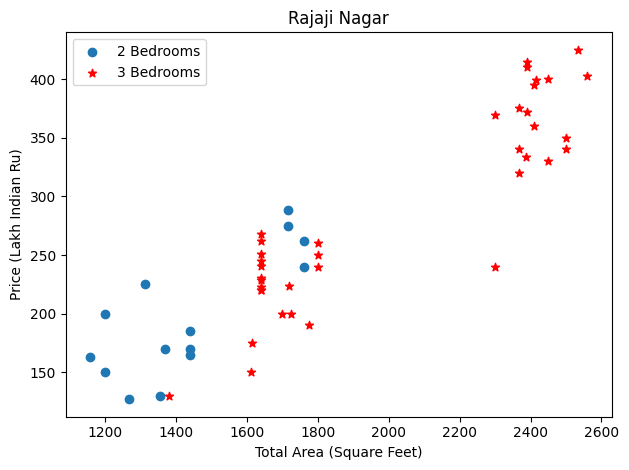

In [45]:
scatter_plots_bedrooms(df_9, 'Rajaji Nagar')

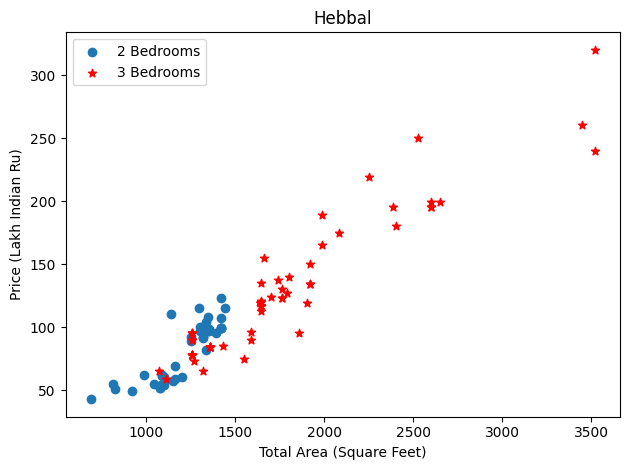

In [46]:
scatter_plots_bedrooms(df_9, 'Hebbal')

- We can see that some `2 Bedrooms` apartments have higher prices than `3 Bedrooms` apartments in the same location which could be an anomoly
- So I will be removing such using mean, standard deviation and count, for example, when the mean and standard deviation of `3 Bedrooms` is clearly greater than that of `2 Bedrooms`, I will be removing the `3 Bedroom` points in relation to prices, keeping in mind the number of counts, I will use the threshold of `5` in this case. See below:

```

{
    '2' : {
        'mean': 5000,
        'std: 3000,
        'count': 14
    },
    '3' : {
        'mean': 6000,
        'std: 3500,
        'count': 12
    },    
}

```

In [47]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df['price_per_sqft']),
                'std': np.std(bedroom_df['price_per_sqft']),
                'count': bedroom_df.shape[0]
            }

        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bedroom_df[(bedroom_df['price_per_sqft']) < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [48]:
df_10 = remove_bedroom_outliers(df_9)

In [49]:
df_10

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,32000.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,69166.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,34188.034188
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,45614.035088
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,45406.546990
...,...,...,...,...,...,...,...
10234,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,83682.008368
10235,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,63829.787234
10237,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,74000.000000
10242,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,72776.280323


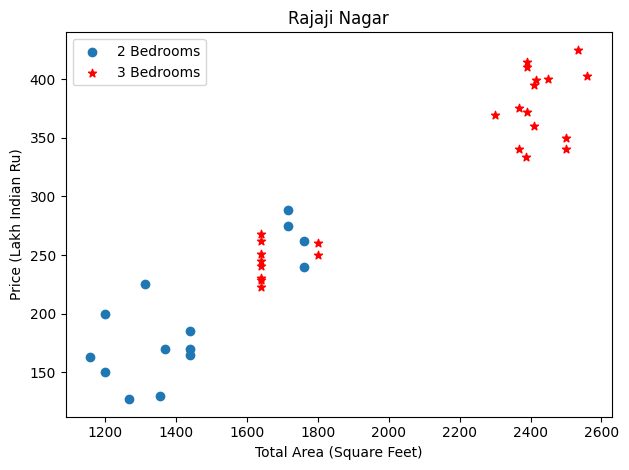

In [50]:
scatter_plots_bedrooms(df_10, 'Rajaji Nagar')

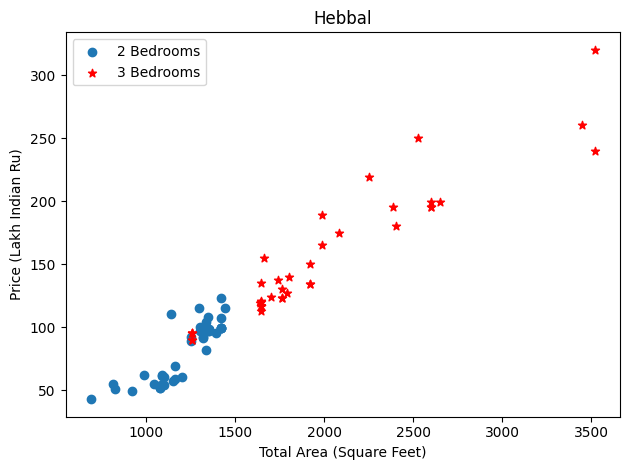

In [51]:
scatter_plots_bedrooms(df_10, 'Hebbal')

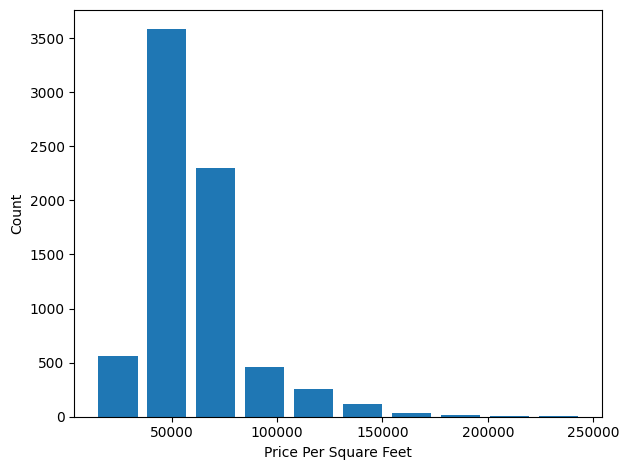

In [52]:
plt.hist(df_10['price_per_sqft'], rwidth=.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.tight_layout()

- The `histogram` of `price per sqft` is almost ideal, with a few outliers on the tail

### Removing Outliers of Baathrooms in relation to Bedrooms


In [53]:
df_10['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df_10[df_10['bath'] > 10]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
5925,Other,10 BHK,12000.0,12.0,525.0,10,43750.00000
6014,Other,16 BHK,10000.0,16.0,550.0,16,55000.00000
6754,Other,11 BHK,6000.0,12.0,150.0,11,25000.00000
7086,Other,13 BHK,5425.0,13.0,275.0,13,50691.24424


- It is highly unlikely to have more `bathrooms` than `bedrooms`
- So assuming I have consultated with the business manager and he gave me the threshold of `x bedrooms = x + 1 bathrooms`, the extra one for guests.

In [55]:
df_11 = df_10[(df_10['bath'] < df_10['bedroom'] + 2)]

In [56]:
df_11

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,32000.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,69166.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,34188.034188
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,45614.035088
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,45406.546990
...,...,...,...,...,...,...,...
10234,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,83682.008368
10235,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,63829.787234
10237,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,74000.000000
10242,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,72776.280323


### One Hot Coding for the Location Feature

In [57]:
dummies = pd.get_dummies(df_11['location']).astype(int)

In [58]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df_12 = pd.concat([df_11.drop(['location', 'size', 'price_per_sqft'], axis='columns'), dummies.drop('Other', axis='columns')], axis='columns')

In [60]:
df_12

,total_sqft,bath,price,bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10242,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model Building

In [61]:
X = df_12.drop('price', axis='columns')

In [62]:
y = df_12['price']

In [63]:
def compare_models(X, y):
    algorithms = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso_reg': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic'],
                'fit_intercept': [True, False]
            }
        },
        'ridge_reg': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 2],
                'fit_intercept': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
    for algorithm_name, config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algorithm_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [64]:
compare_models(X, y)

C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundati

,model,best_score,best_params
0,linear_regression,0.856685,{'fit_intercept': False}
1,lasso_reg,0.719143,"{'alpha': 2, 'fit_intercept': True, 'selection..."
2,ridge_reg,0.854496,"{'alpha': 1, 'fit_intercept': True}"
3,decision_tree,0.773929,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


- The linear regression and the ridge regression ones perform relatively the same, so I will pick on of the two

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
model.score(X_test, y_test)

0.8282622786925904

In [68]:
def model_predict(location, total_sqft, bath, bedroom):
    location_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bedroom

    if location_index >= 0:
        x[location_index] = 1
    
    return float(model.predict([x])[0])

In [69]:
model_predict('1st Phase JP Nagar',1000, 2, 2)

89.08036942345367

In [70]:
model_predict('1st Phase JP Nagar',1000, 3, 3)

92.69846443124851

In [71]:
model_predict('Indira Nagar',1000, 2, 2)

192.4296127765109

In [72]:
model_predict('Indira Nagar',1000, 3, 3)

196.04770778430571

### Export the model and its features

In [78]:
import pickle
with open('apartment_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [79]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

### Use cases
- Property Price Predictions
- Optimal Property Investments Decision
- Location Insights
- Lease and Contract Analysis
- Personalised Property Recommendations

### Future work
- Deploy the model to `docker` with its `dependencies`
- Create a friendly `UI` for non-technical people